# BIBLIOTECAS

In [25]:
!pip3 install pandas numpy seaborn matplotlib missingno

In [26]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import missingno as msno

# SANITY CHECK

## Objetivos:

- Entendimento inicial de cada uma das bases de dados
- Analisar propriedades das colunas das bases
- Identificar e tratar possíveis inconsistências nos dados

In [3]:
# Obter a lista de arquivos CSV no diretório
csv_files = glob.glob('../data/raw/*.csv')

df_list = [pd.read_csv(file) for file in csv_files]

In [4]:
csv_files

['../data/raw\\DemographicData_ZCTAs.csv',
 '../data/raw\\df_geocode (1).csv',
 '../data/raw\\EconomicData_ZCTAs (1).csv',
 '../data/raw\\exams_data.csv',
 '../data/raw\\transactional_data (1).csv']

In [5]:
demographic_df = pd.read_csv(csv_files[0])
geocode_df = pd.read_csv(csv_files[1])
economic_df = pd.read_csv(csv_files[2])
exams_df = pd.read_csv(csv_files[3])
transactional_df = pd.read_csv(csv_files[4])

Dataframes criados:
- demographic_df
- geocode_df
- economic_df
- exams_df
- transactional_df

Função para checar duplicadas e valores ausentes nos dataframes

In [21]:
def check_dataframe_quality(df: pd.DataFrame) -> dict:
    """
    Avalia a qualidade de um DataFrame em termos de valores ausentes, duplicados e tipos de dados.

    Args:
        df (pd.DataFrame): DataFrame a ser avaliado.

    Returns:
        dict: Dicionário contendo:
            - 'duplicated_rows' (int): número de linhas duplicadas;
            - 'missing_values' (pd.Series): contagem de valores ausentes por coluna.
    """
    return {
        "duplicated_rows": df.duplicated().sum(),
        "missing_values": df.isnull().sum(),
        "unique_values": df.nunique()
    }

Função para visualização geral dos dados

In [14]:
def summarize_dataframe(df: pd.DataFrame, df_name: str) -> None:
    """
    Exibe informações resumidas de um DataFrame, incluindo colunas, shape e informações gerais.

    Args:
        df (pd.DataFrame): DataFrame a ser resumido.
        df_name (str): Nome do DataFrame.
    """
    print(f"Resumo do DataFrame: {df_name}")
    print("")
    print("Colunas do dataframe:", df.columns)
    print("")
    print("Shape do dataframe:", df.shape)
    print("")
    print(df.info())
    print("")
    pd.set_option('display.width', 1000)
    pd.set_option('display.max_columns', None)
    print(df.head())
    print("")

### Visualização do demographic_df

#### Visão geral do dataframe

In [15]:
summarize_dataframe(demographic_df, "demographic_df")

Resumo do DataFrame: demographic_df

Colunas do dataframe: Index(['Unnamed: 0', 'Id', 'GeographicAreaName', 'TotalPopulation', 'SexRatio(males per 100 females)', 'Population_Under5Years', 'Population_5to9Years', 'Population_10to14Years', 'Population_15to19Years', 'Population_20to24Years', 'Population_25to34Years', 'Population_35to44Years', 'Population_45to54Years', 'Population_55to59Years', 'Population_60to64Years', 'Population_65to74Years', 'Population_75to84Years', 'Population_85YearsAndOver', 'MedianAgeInYears'], dtype='object')

Shape do dataframe: (33120, 19)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33120 entries, 0 to 33119
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       33120 non-null  int64  
 1   Id                               33120 non-null  object 
 2   GeographicAreaName               33120 non-null  object 
 3   Tota

Vamos remover essa primeira coluna que é apenas o index das linhas.

In [30]:
demographic_df = demographic_df.drop(columns=["Unnamed: 0"])

Nota-se que a maioria das colunas da base é numérica, com características relacionadas à demografia populacional da área geográfica. A maior parte das variáveis que descrevem as características populacionais são numéricas, porém existem variáveis aparentemente categóricas, que parecem ser chaves, sendo elas:

- `Id` (Identificador único da área geográfica)
- `GeographicAreaName` (Nome da área geográfica)

In [16]:
print(f"Quantidade de valores únicos na coluna 'Id': {demographic_df['Id'].nunique()}")
print(f"Quantidade de valores únicos na coluna 'GeographicAreaName': {demographic_df['GeographicAreaName'].nunique()}")

Quantidade de valores únicos na coluna 'Id': 33120
Quantidade de valores únicos na coluna 'GeographicAreaName': 33120


Como essas variáveis possuem valores únicos por linha, elas podem ser utilizadas como chaves primárias e servir de referência para realizar junções com outras tabelas.

#### Verificando possíveis incosistências

No contexto do dataframe demográfico, valores negativos em colunas numéricas não são esperados. Portanto, vamos realizar uma validação para verificar se algum valor negativo está presente nessas colunas.

In [18]:
numeric_columns = demographic_df.select_dtypes(include=['int64', 'float64']).columns
negative_values = {col: (demographic_df[col] < 0).any() for col in numeric_columns}
negative_columns = [col for col, has_negative in negative_values.items() if has_negative]
print(f"Colunas com valores negativos: {negative_columns}")

Colunas com valores negativos: []


Nenhuma inconsistência relacionada a valores negativos foi identificada nas colunas numéricas.

#### Verificando e tratando valores ausentes

Vamos iniciar a análise de qualidade verificando valores ausentes, duplicações e a quantidade de valores únicos por coluna.

In [32]:
quality_report = check_dataframe_quality(demographic_df)

print("\nValores ausentes por coluna:\n", quality_report["missing_values"])
print("\nNúmero de linhas duplicadas:", quality_report["duplicated_rows"])
print("\nNúmero de valores únicos por coluna:\n", quality_report["unique_values"])


Valores ausentes por coluna:
 Id                                   0
GeographicAreaName                   0
TotalPopulation                      0
SexRatio(males per 100 females)    500
Population_Under5Years               0
Population_5to9Years                 0
Population_10to14Years               0
Population_15to19Years               0
Population_20to24Years               0
Population_25to34Years               0
Population_35to44Years               0
Population_45to54Years               0
Population_55to59Years               0
Population_60to64Years               0
Population_65to74Years               0
Population_75to84Years               0
Population_85YearsAndOver            0
MedianAgeInYears                   569
dtype: int64

Número de linhas duplicadas: 0

Número de valores únicos por coluna:
 Id                                 33120
GeographicAreaName                 33120
TotalPopulation                    15504
SexRatio(males per 100 females)     1985
Population_Under5Ye

Separando o dataframe em que existem valores nulos para analisarmos melhor.

In [33]:
missing_rows = demographic_df[demographic_df.isnull().any(axis=1)]
print(missing_rows.head())

                 Id GeographicAreaName  TotalPopulation  SexRatio(males per 100 females)  Population_Under5Years  Population_5to9Years  Population_10to14Years  Population_15to19Years  Population_20to24Years  Population_25to34Years  Population_35to44Years  Population_45to54Years  Population_55to59Years  Population_60to64Years  Population_65to74Years  Population_75to84Years  Population_85YearsAndOver  MedianAgeInYears
5    8600000US35013        ZCTA5 35013               46                              NaN                       0                     0                       0                       0                       0                       0                      15                      31                       0                       0                       0                       0                          0              47.9
42   8600000US35074        ZCTA5 35074               99                             86.8                       0                     0                       0  

Aqui aparece algumas informações úteis, algumas dessas colunas em que `SexRatio(males per 100 females)` e `MedianAgeInYears` estão com valores ausentes, a população total da ZCTA é zero. Inicialmente cabe verificarmos essas colunas e tratar as outras que sobrarem.

1. Verificação: ZCTAs com `TotalPopulation` = 0 e se `SexRatio(males per 100 females)` e `MedianAgeInYears` são NaN

In [35]:
pop_zero = missing_rows["TotalPopulation"] == 0

medianage_nan_when_pop_zero = missing_rows.loc[pop_zero, "MedianAgeInYears"].isnull()
sexratio_nan_when_pop_zero = missing_rows.loc[pop_zero, "SexRatio(males per 100 females)"].isnull()
both_nan_when_pop_zero = medianage_nan_when_pop_zero & sexratio_nan_when_pop_zero

print(medianage_nan_when_pop_zero.sum())
print(sexratio_nan_when_pop_zero.sum())
print(both_nan_when_pop_zero.sum())

344
344
344


Todas as ZCTAs com TotalPopulation igual a zero possuem MedianAgeInYears e SexRatio ausentes, como era esperado.

2. Filtrando os casos em que MedianAgeInYears é NaN e TotalPopulation não é zero

In [36]:
filtered_df = missing_rows[~pop_zero & missing_rows["MedianAgeInYears"].isnull()]

print(filtered_df.shape)
print(filtered_df.head())

(225, 18)
                 Id GeographicAreaName  TotalPopulation  SexRatio(males per 100 females)  Population_Under5Years  Population_5to9Years  Population_10to14Years  Population_15to19Years  Population_20to24Years  Population_25to34Years  Population_35to44Years  Population_45to54Years  Population_55to59Years  Population_60to64Years  Population_65to74Years  Population_75to84Years  Population_85YearsAndOver  MedianAgeInYears
42   8600000US35074        ZCTA5 35074               99                             86.8                       0                     0                       0                       0                       0                      99                       0                       0                       0                       0                       0                       0                          0               NaN
97   8600000US35187        ZCTA5 35187                6                            100.0                       0                     0                

Em seguida, verificamos se existe alguma informação populacional por faixa etária nos casos filtrados, mesmo com a ausência de `MedianAgeInYears`.

In [41]:
age_columns = [col for col in missing_rows.columns if "Population_" in col and "Years" in col]

In [43]:
has_population_values = (filtered_df[age_columns] > 0).any(axis=1).any()

if has_population_values:
    print("O DataFrame filtrado possui pelo menos uma coluna com valor maior que zero.")
else:
    print("O DataFrame filtrado não contém nenhuma coluna com valores populacionais maiores que zero.")

O DataFrame filtrado possui pelo menos uma coluna com valor maior que zero.


Dos 569 valores ausentes em `MedianAgeInYears`, observamos o seguinte cenário:

- **344** ocorrem em ZCTAs com `TotalPopulation` igual a zero, o que justifica a ausência do dado;
- **225** correspondem a ZCTAs com população total maior que zero. Nesses casos, embora o valor da mediana possa ser estimado a partir da distribuição populacional por faixa etária, ele não foi informado, o que pode indicar uma lacuna ou falha na consolidação dos dados.

3. Calculando `MedianAgeInYears` nos casos em que conseguimos calcular.

A seguir, definimos uma função para estimar a idade mediana (`MedianAgeInYears`) com base na distribuição de população por faixas etárias. A estimativa utiliza o conceito de mediana em classes, considerando os limites e larguras das faixas etárias disponíveis.

In [44]:
age_classes = {
    "Population_Under5Years": (0, 5),
    "Population_5to9Years": (5, 5),
    "Population_10to14Years": (10, 5),
    "Population_15to19Years": (15, 5),
    "Population_20to24Years": (20, 5),
    "Population_25to34Years": (25, 10),
    "Population_35to44Years": (35, 10),
    "Population_45to54Years": (45, 10),
    "Population_55to59Years": (55, 5),
    "Population_60to64Years": (60, 5),
    "Population_65to74Years": (65, 10),
    "Population_75to84Years": (75, 10),
    "Population_85YearsAndOver": (85, 15)  # estimativa para o final aberto
}

def estimate_median_class(row):
    """
    Estima a mediana usando distribuição em classes para faixas etárias.
    
    Args:
        row (pd.Series): Linha com dados de população por faixa etária.
    
    Returns:
        float: Idade mediana estimada ou None.
    """
    frequencies = [(col, row[col]) for col in age_columns if pd.notnull(row[col]) and row[col] > 0]
    total_pop = sum(freq for _, freq in frequencies)

    if total_pop == 0:
        return None

    cumulative = 0
    for col, freq in frequencies:
        cumulative += freq
        if cumulative >= total_pop / 2:
            L, w = age_classes[col]
            prev_cum = cumulative - freq
            median = L + (((total_pop / 2) - prev_cum) / freq) * w
            return median

    return None

def should_apply_median(row):
    pop_sum = row[age_columns].sum()
    return pop_sum == row["TotalPopulation"]

Para os casos em que há população total e as faixas etárias estão devidamente preenchidas, conseguimos calcular `MedianAgeInYears` por meio da função de estimativa definida.

In [45]:
filtered_df.loc[filtered_df.apply(should_apply_median, axis=1), "MedianAgeInYears"] = filtered_df[filtered_df.apply(should_apply_median, axis=1)].apply(estimate_median_class, axis=1)

filtered_df.head()

,Id,GeographicAreaName,TotalPopulation,SexRatio(males per 100 females),Population_Under5Years,Population_5to9Years,Population_10to14Years,Population_15to19Years,Population_20to24Years,Population_25to34Years,Population_35to44Years,Population_45to54Years,Population_55to59Years,Population_60to64Years,Population_65to74Years,Population_75to84Years,Population_85YearsAndOver,MedianAgeInYears
42,8600000US35074,ZCTA5 35074,99,86.8,0,0,0,0,0,99,0,0,0,0,0,0,0,30.000000
97,8600000US35187,ZCTA5 35187,6,100.0,0,0,0,0,0,0,0,0,0,0,6,0,0,70.000000
178,8600000US35559,ZCTA5 35559,12,100.0,0,0,0,0,0,0,6,6,0,0,0,0,0,45.000000
207,8600000US35615,ZCTA5 35615,60,252.9,0,0,0,0,0,0,43,0,17,0,0,0,0,41.976744
403,8600000US36267,ZCTA5 36267,7,NaN,0,0,0,0,0,0,0,0,7,0,0,0,0,57.500000


Vamos manter o `filtered_df` com os valores estimados em espera. Caso, ao final desta etapa da análise, consideremos adequado, poderemos substituir essas linhas diretamente no dataframe demográfico original.

4. Filtrando os casos em que `SexRatio(males per 100 females)` é NaN e TotalPopulation não é zero

Selecionamos as linhas em que a razão de sexo está ausente, mesmo havendo população registrada — o que pode indicar uma falha na coleta ou no processamento desses dados.

In [46]:
filtered_sexratio_nan = demographic_df[(demographic_df["TotalPopulation"] != 0) & (demographic_df["SexRatio(males per 100 females)"].isnull())]

print(filtered_sexratio_nan)

                   Id GeographicAreaName  TotalPopulation  SexRatio(males per 100 females)  Population_Under5Years  Population_5to9Years  Population_10to14Years  Population_15to19Years  Population_20to24Years  Population_25to34Years  Population_35to44Years  Population_45to54Years  Population_55to59Years  Population_60to64Years  Population_65to74Years  Population_75to84Years  Population_85YearsAndOver  MedianAgeInYears
5      8600000US35013        ZCTA5 35013               46                              NaN                       0                     0                       0                       0                       0                       0                      15                      31                       0                       0                       0                       0                          0              47.9
403    8600000US36267        ZCTA5 36267                7                              NaN                       0                     0                    

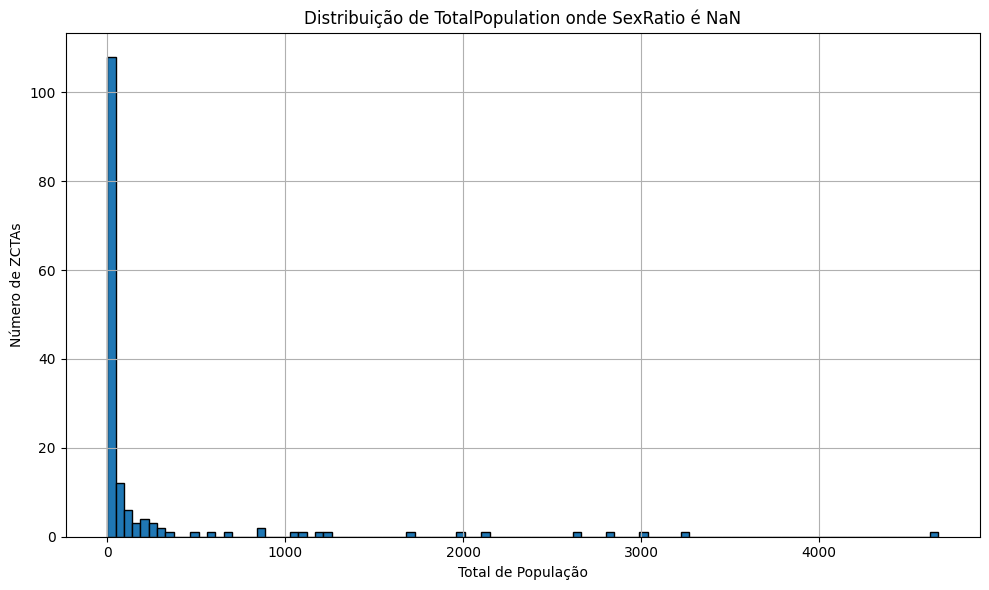

In [47]:
plt.figure(figsize=(10, 6))
plt.hist(filtered_sexratio_nan["TotalPopulation"], bins=100, edgecolor='black')
plt.title("Distribuição de TotalPopulation onde SexRatio é NaN")
plt.xlabel("Total de População")
plt.ylabel("Número de ZCTAs")
plt.grid(True)
plt.tight_layout()
plt.show()

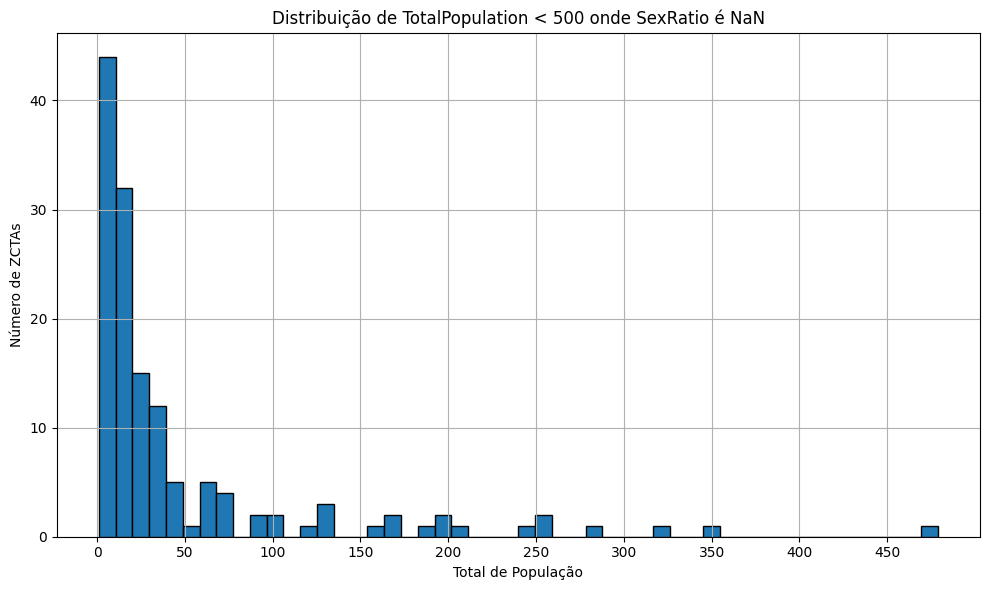

In [48]:
filtered_population = filtered_sexratio_nan[filtered_sexratio_nan["TotalPopulation"] < 500]

plt.figure(figsize=(10, 6))
plt.hist(filtered_population["TotalPopulation"], bins=50, edgecolor='black')
plt.title("Distribuição de TotalPopulation < 500 onde SexRatio é NaN")
plt.xlabel("Total de População")
plt.ylabel("Número de ZCTAs")
plt.grid(True)
plt.xticks(np.arange(0, 500, 50))  # Adiciona mais marcações no eixo x
plt.tight_layout()
plt.show()

Filtramos os casos com população total nas faixas etárias igual ou inferior a 30 indivíduos.

In [49]:
population_sum = filtered_sexratio_nan[age_columns].sum(axis=1)
rows_with_population_leq_30 = filtered_sexratio_nan[population_sum <= 30]
print(len(rows_with_population_leq_30))

92


Com base nos dois histogramas, observamos uma concentração significativa de casos com `SexRatio` ausente (`NaN`) em regiões com população total bastante reduzida. Essa ausência pode ser explicada pela presença de indivíduos de apenas um dos gêneros nesses ZCTAs, o que inviabiliza o cálculo da razão entre homens e mulheres. Aproximadamente **60%** dos registros com `SexRatio` ausente possuem uma população total igual ou inferior a 30 indivíduos.

Por outro lado, também identificamos alguns casos com população relativamente alta e `SexRatio` ausente. Esses casos podem indicar regiões com restrições de sexo — como áreas ocupadas predominantemente por homens ou mulheres — a exemplo de instalações militares, monastérios ou outras zonas com acesso restrito por gênero. Esse é um ponto que vale ser analisando cerificando as localizações geográficas.

Substituímos os valores originais pela mediana recalculada a partir de `filtered_df`, por ser uma medida mais robusta. A atualização foi feita com base na correspondência entre os IDs.

In [ ]:
demographic_df.update(filtered_df[['Id', 'MedianAgeInYears']].set_index('Id'))
demographic_df.reset_index(inplace=True)

#### Verificando os outliers

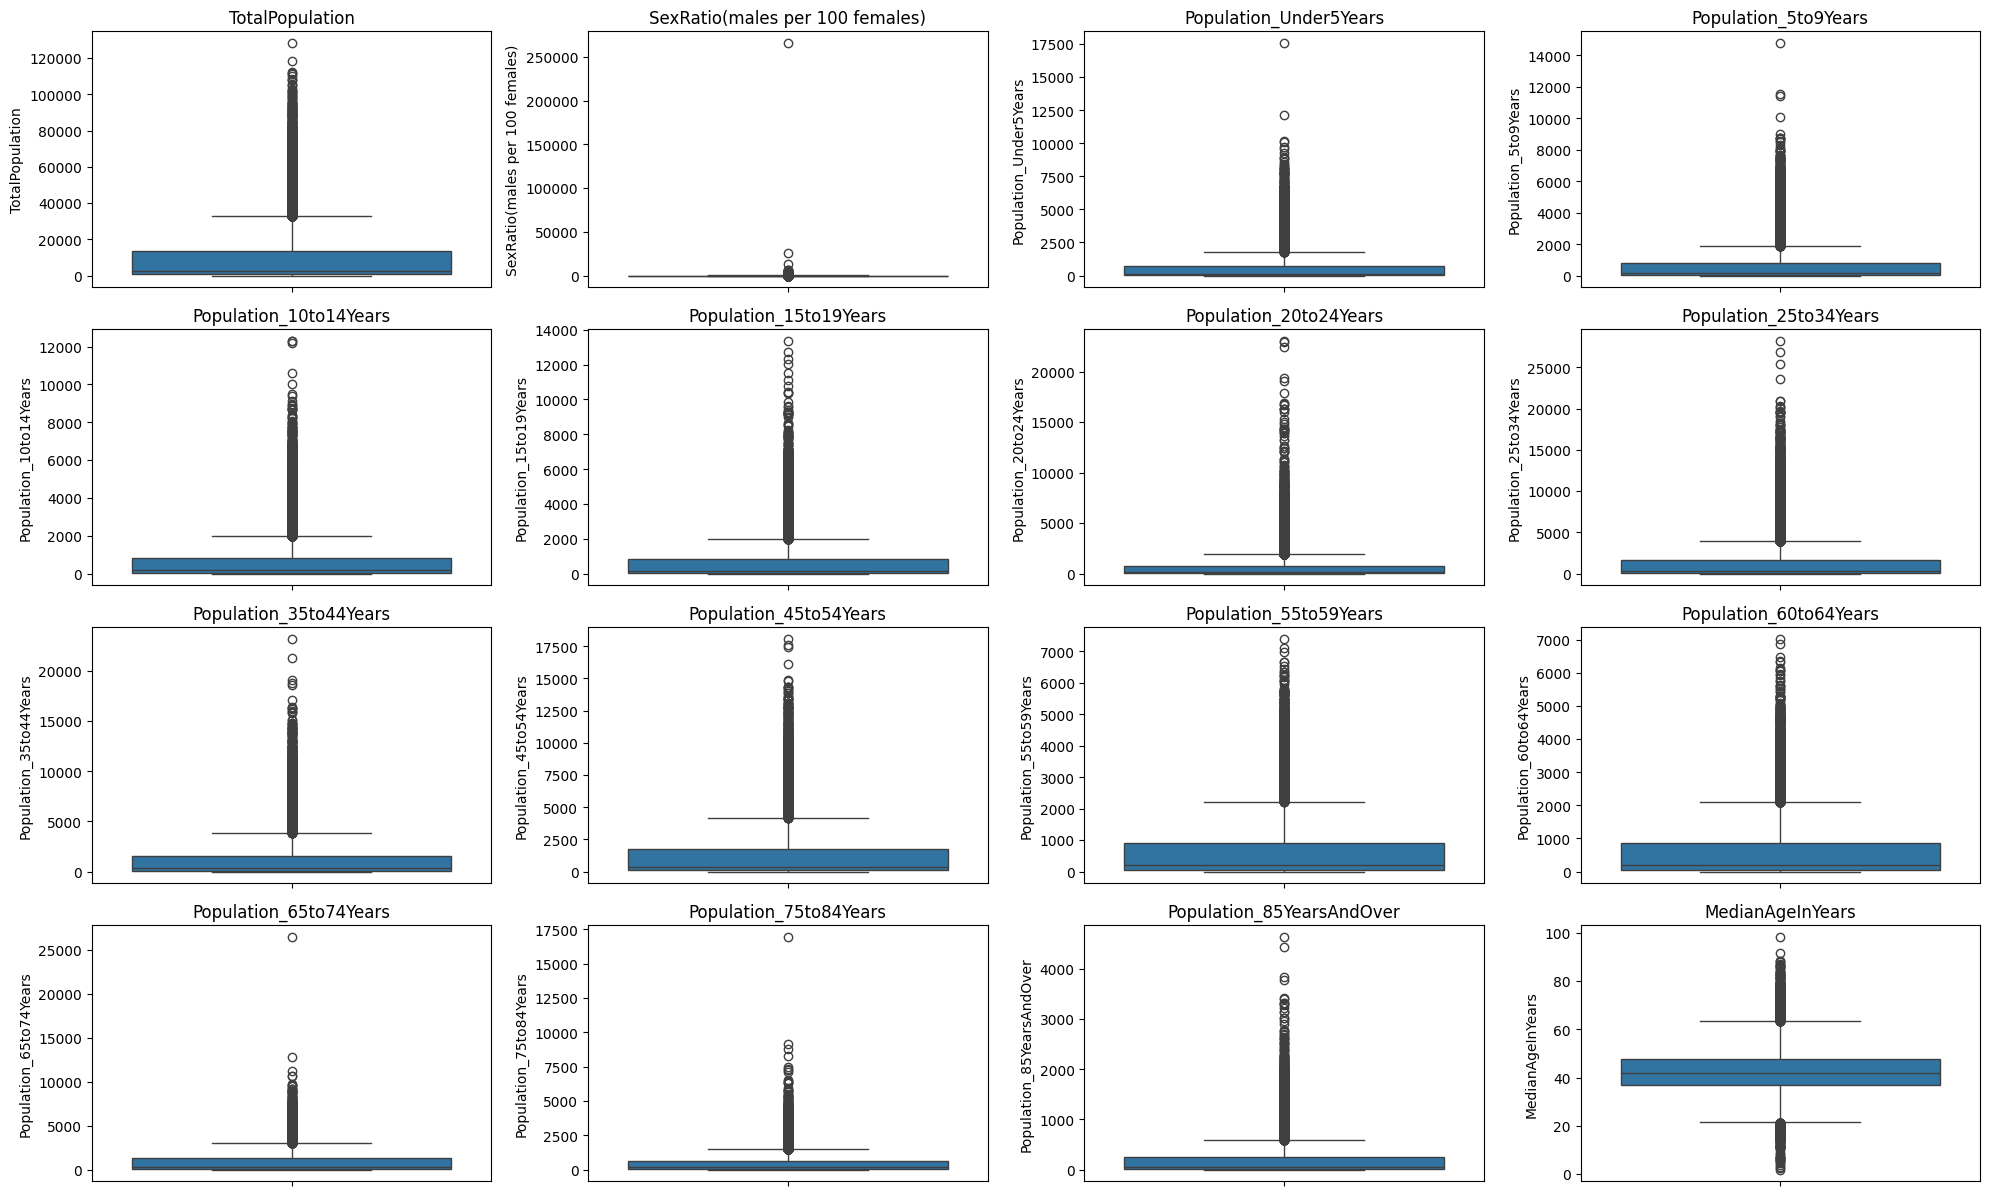

In [ ]:
plt.figure(figsize=(20, 15))

for i, column in enumerate(demographic_df.select_dtypes(include=['int64', 'float64']).columns, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(y=demographic_df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

Conclusão e Recomendações

Os dados demográficos refletem bem a diversidade entre os ZCTAs, com assimetria à direita e outliers esperados em regiões mais populosas. Esses valores não devem ser descartados, pois podem indicar oportunidades relevantes. Para análises futuras, recomenda-se o uso de medidas robustas (como a mediana) e, se necessário, transformações logarítmicas para reduzir o impacto de extremos. Em modelagens, algoritmos como árvores de decisão e gradient boosting são mais apropriados por lidarem bem com distribuições não normais.

### Visualização do geocode_df

#### Visão geral do dataframe

In [53]:
summarize_dataframe(geocode_df, "geocode_df")

Resumo do DataFrame: geocode_df

Colunas do dataframe: Index(['Unnamed: 0', 'Lab Id', 'Address', 'Location', 'Zipcode'], dtype='object')

Shape do dataframe: (119, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  119 non-null    int64  
 1   Lab Id      119 non-null    object 
 2   Address     119 non-null    object 
 3   Location    119 non-null    object 
 4   Zipcode     118 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.8+ KB
None

   Unnamed: 0 Lab Id                                            Address                 Location  Zipcode
0           0   L152      3800 PLEASANT HILL RD STE 1, DULUTH, GA 30096    34.000319,-84.1629724  30096.0
1           1   L520                    1614 N JAMES ST, ROME, NY 13440   43.2311327,-75.4445363  13440.0
2           2   L141     12911 120TH AVE NE STE D60, KI

Vamos remover essa primeira coluna que é apenas o index das linhas.

In [ ]:
geocode_df = geocode_df.drop(columns=["Unnamed: 0"])

KeyError: "['Unnamed: 0'] not found in axis"

In [56]:
geocode_df.head()

,Lab Id,Address,Location,Zipcode
0,L152,"3800 PLEASANT HILL RD STE 1, DULUTH, GA 30096","34.000319,-84.1629724",30096.0
1,L520,"1614 N JAMES ST, ROME, NY 13440","43.2311327,-75.4445363",13440.0
2,L141,"12911 120TH AVE NE STE D60, KIRKLAND, WA 98034","47.7162786,-122.1838152",98034.0
3,L524,"5667 PEACHTREE DUNWOODY RD 250, ATLANTA, GA 30342","33.9093875,-84.3529096",30342.0
4,L545,"1204 IL HWY 164, OQUAWKA, IL 61469","40.9309925,-90.9437598",61469.0


Descrição das colunas

- **Lab Id** (`object`): Identificador único do laboratório. Atua como chave primária dessa tabela e será usado como chave estrangeira em outras bases, como `transactional_data`.

- **Address** (`object`): Endereço completo do laboratório, armazenado como string. Útil para inspeção manual e validações pontuais.

- **Location** (`object`): Coordenadas geográficas no formato "latitude, longitude". Essencial para análises espaciais, como mapeamento e clusterização. Idealmente deve ser desmembrado em duas colunas numéricas.

- **Zipcode** (`float64`): Código ZCTA (Zip Code Tabulation Area) associado ao laboratório. Permite junção com bases externas de dados econômicos e demográficos. É o principal elo para enriquecimento regional.

- **Unnamed: 0** (`int64`): Coluna de índice automático gerada na exportação do dataframe. Não possui valor analítico e pode ser descartada.

Fazer um describe e unique rapido
Falar de cardinalidades
Usada para enriquecer a base

#### Verificando e tratando valores ausentes

Vamos iniciar a análise de qualidade verificando valores ausentes, duplicações e a quantidade de valores únicos por coluna.

In [57]:
quality_report = check_dataframe_quality(geocode_df)

print("\nValores ausentes por coluna:\n", quality_report["missing_values"])
print("\nNúmero de linhas duplicadas:", quality_report["duplicated_rows"])
print("\nNúmero de valores únicos por coluna:\n", quality_report["unique_values"])


Valores ausentes por coluna:
 Lab Id      0
Address     0
Location    0
Zipcode     1
dtype: int64

Número de linhas duplicadas: 0

Número de valores únicos por coluna:
 Lab Id      119
Address     119
Location    117
Zipcode     105
dtype: int64


### Visualização do economic_df

In [ ]:
print("Colunas do dataframe economic:", economic_df.columns)
print("Shape do dataframe economic", economic_df.shape)
print(economic_df.info())

In [ ]:
pd.set_option('display.width', 600)
pd.set_option('display.max_columns', None)
print(economic_df.head(5))

### Visualização do exams_df

In [ ]:
print("Colunas do dataframe exams:", exams_df.columns)
print("Shape do dataframe exams", exams_df.shape)
print(exams_df.info())

In [ ]:
print(exams_df.isnull().sum())

In [ ]:
print(exams_df.head(5))

### Visualização do transactional_df

In [ ]:
print("Colunas do dataframe transactional:", transactional_df.columns)
print("Shape do dataframe transactional", transactional_df.shape)
print(transactional_df.info())

Aqui observamos que o dataframe foi lido de maneira incorreta, então precisou-se ajustar para fazer a leitura correta

In [ ]:
transactional_df = pd.read_csv(csv_files[4], sep=';', index_col=False)

print("Colunas do dataframe transactional ajustado:", transactional_df.columns)
print("Shape do dataframe transactional ajustado", transactional_df.shape)
print(transactional_df.info())

In [ ]:
transactional_df = transactional_df.astype({col: 'str' for col in transactional_df.select_dtypes(include='object').columns})

In [ ]:
print(transactional_df.isnull().sum())

In [ ]:
print(transactional_df[transactional_df.isnull().any(axis=1)])

Preciso entender como tratar essa linha

In [ ]:
patients_with_id_minus_two = df[df["Patient Id"] == "-2"]
print(patients_with_id_minus_two)

In [ ]:
# Verificar duplicatas considerando todas as colunas
duplicated_rows = transactional_df[transactional_df.duplicated()]
df = duplicated_rows.sort_values(by='Patient Id')
print(df.head(10))

In [ ]:
transactional_df[transactional_df.duplicated()]

In [ ]:
pd.set_option('display.width', 600)
pd.set_option('display.max_columns', None)
print(transactional_df.head(5))

# EDA